# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nabil Defin Jatmiko
- **Email:** nabildefinjatmiko@gmail.com
- **ID Dicoding:** MC229D5Y0769

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata bulanan dari kadar O3 pada Shunyi Station?
- Faktor apa yang paling mempengaruhi kadar O3 pada Shunyi Station? Atribut apa yang paling mempengaruhi kadar O3? Bagaimana atribut tersebut mempengaruhi kadar O3?

## Import Semua Packages/Library yang Digunakan

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [345]:
# Memasukkan dataset dan menampilkan 5 data teratas
main_data = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
main_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Terlihat atribut pada shunyi station terkait air quality
- Konsentrasi pencemar ditunjukkan oleh atribu PM2.5, PM10, SO2, dan NO2
- Cuaca ditunjukkan oleh TEMP, PRES, DEWP, WSPM, wd, dan RAIN

Dari dataset tersebut, telah diperoleh apa saja yang dibutuhkan dalam menyelesaikan pertanyaan analisis diatas. Atribut yang dibutuhkan dalam menyelesaikan pertanyaan tersebut adalah DATE (Berupa Year, Month, Day, Hour), konsentrasi pencemar, dan kadar O3.

### Assessing Data

In [346]:
# Mengecek apakah dataset masih memiliki missing value
missing_value = main_data.isna().sum()
missing_value[missing_value > 0]

,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178
O3,1489
TEMP,51
PRES,51
DEWP,54
RAIN,51


In [347]:
# Melihat struktur dari dataset
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [348]:
# Mengecek apakah ada duplikasi data
main_data.duplicated().sum()

0

In [349]:
# Melihat Statiktika Deskriptif dari atribut numerik
main_data.describe(include= "number")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


**Insight:**
- Untuk membuat tren diperlukannya atribut waktu. Pada dataset belum memiliki atribut tersebut, maka pada data cleaning akan ditambahkan atribut waktu.
- Dataset memiliki 35064 data dengan 18 kolom yang diantara data tersebut masih memiliki missing value. Atribut yang memiliki missing value yaitu PM2.5, PM10,SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.
- Data dari dataset tidak memiliki duplikasi.
- Terlihat juga statistika deskriptif dari atribut numerik.

### Cleaning Data

In [350]:
# Mengisi nilai pada atribut numerik
numerik_col = main_data.select_dtypes(include= ["number"]).columns
main_data[numerik_col]= main_data[numerik_col].interpolate(method= "linear", limit_direction= "both")

In [351]:
# Mengisi nilai atribut kategorik
main_data["wd"] = main_data["wd"].fillna(main_data["wd"].mode()[0])

In [352]:
# Melihat hasil pengisian nilai
missing_value = main_data.isna().sum()
missing_value[missing_value > 0]

,0


In [353]:
# Menambahkan atribut date pada dataset
main_data["date"]= pd.to_datetime(main_data[["year","month","day", "hour"]])
main_data["date"].head()

,date
0,2013-03-01 00:00:00
1,2013-03-01 01:00:00
2,2013-03-01 02:00:00
3,2013-03-01 03:00:00
4,2013-03-01 04:00:00


**Insight:**
- Missing value pada atribut numerik diisikan dengan mengisikan nilai interpolate dengan metode linear dikarenakan dataset tersebut berbentuk time series.
- Missing value pada atribut kategorik "wd" diisikan dengan mengisikan nilai modulus atau nilai yang paling sering muncul.
- Telah dibuat juga atribut date untuk mempermudah melihat tren.

## Exploratory Data Analysis (EDA)

###*Explore tren dan korelasi*

In [354]:
# Merata-ratakan O3 di setiap bulannya
monthly_average_O3 = main_data.groupby(main_data["date"].dt.to_period("M"))["O3"].mean().reset_index()
monthly_average_O3.head()

,date,O3
0,2013-03,52.937431
1,2013-04,56.347833
2,2013-05,86.481760
3,2013-06,75.071659
4,2013-07,80.415035


In [355]:
# Mengubah "date" dari period menjadi datetime
monthly_average_O3["date"] = pd.to_datetime(monthly_average_O3["date"].dt.to_timestamp())

In [356]:
# Menggabungkan data faktor pencemar dan cuaca dengan O3
factor_df = main_data[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3","TEMP", "PRES", "DEWP", "WSPM", "RAIN"]].copy()
factor_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,RAIN
0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,9.3,0.0
1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,9.4,0.0
2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,8.6,0.0
3,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,6.6,0.0
4,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,4.5,0.0


In [357]:
# Korelasi antara faktor cuaca dan pencemar dengan O3
factor_df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,RAIN
PM2.5,1.000000,0.889705,0.461935,0.635951,0.776079,-0.126368,-0.120102,0.002149,0.118777,-0.268076,-0.008090
PM10,0.889705,1.000000,0.462236,0.640850,0.696424,-0.107019,-0.085737,-0.029982,0.082564,-0.189076,-0.023373
SO2,0.461935,0.462236,1.000000,0.505000,0.502439,-0.138480,-0.314040,0.217523,-0.262214,-0.122205,-0.038928
NO2,0.635951,0.640850,0.505000,1.000000,0.653669,-0.413245,-0.295962,0.149024,-0.080150,-0.382243,-0.051217
CO,0.776079,0.696424,0.502439,0.653669,1.000000,-0.244020,-0.279106,0.133241,-0.020542,-0.285803,-0.003677
O3,-0.126368,-0.107019,-0.138480,-0.413245,-0.244020,1.000000,0.566882,-0.418559,0.286705,0.309847,0.023954
TEMP,-0.120102,-0.085737,-0.314040,-0.295962,-0.279106,0.566882,1.000000,-0.825859,0.823959,0.062910,0.039382
PRES,0.002149,-0.029982,0.217523,0.149024,0.133241,-0.418559,-0.825859,1.000000,-0.762659,0.016784,-0.063945
DEWP,0.118777,0.082564,-0.262214,-0.080150,-0.020542,0.286705,0.823959,-0.762659,1.000000,-0.256374,0.087417
WSPM,-0.268076,-0.189076,-0.122205,-0.382243,-0.285803,0.309847,0.062910,0.016784,-0.256374,1.000000,0.028889


In [358]:
# Merata-ratakan TEMP di setiap bulannya
monthly_average_TEMP = main_data.groupby(main_data["date"].dt.to_period("M"))["TEMP"].mean().reset_index()
monthly_average_TEMP.head()

,date,TEMP
0,2013-03,5.645161
1,2013-04,12.219722
2,2013-05,21.645161
3,2013-06,23.644167
4,2013-07,27.130511


In [359]:
# Mengubah "date" dari period menjadi datetime
monthly_average_TEMP["date"] = pd.to_datetime(monthly_average_TEMP["date"].dt.to_timestamp())

In [360]:
# Menggabungkan monthly average TEMP dan O3
monthly_average_O3_TEMP = monthly_average_O3.merge(monthly_average_TEMP, on= "date", how= "left")
monthly_average_O3_TEMP.head()

,date,O3,TEMP
0,2013-03-01,52.937431,5.645161
1,2013-04-01,56.347833,12.219722
2,2013-05-01,86.481760,21.645161
3,2013-06-01,75.071659,23.644167
4,2013-07-01,80.415035,27.130511


**Insight:**
- Terlihat secara sekilas bahwasannya O3 sangat berkorelasi dengan TEMP dengan nilai korelasi bernilai 0.566882.
- Dikarenakan O3 dan TEMP berkorelasi baik, terlihat juga secara sekila jika O3 bertmabah maka TEMP juga bertambah demikian pula untuk sebaliknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

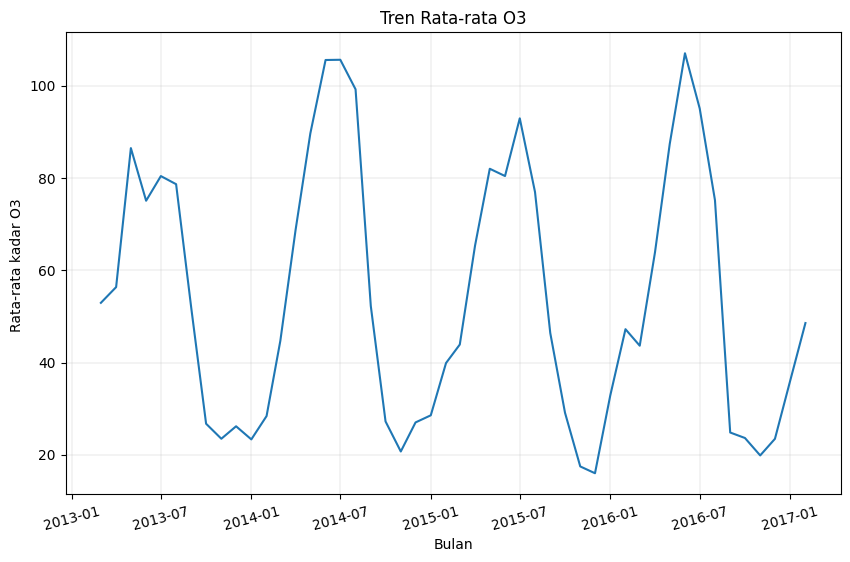

In [361]:
# Visualisasi tren O3 perbulannya
plt.figure(figsize=(10,6))
sns.lineplot(data= monthly_average_O3,
             x= "date",
             y= "O3",
             linestyle= "-")
plt.xticks(rotation=15)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata kadar O3 ")
plt.title("Tren Rata-rata O3")
plt.grid(linewidth = 0.2)
plt.show()

### Pertanyaan 2:

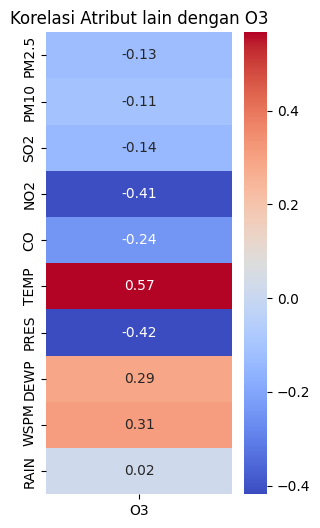

In [362]:
# Korelasi antara O3 dengan atribut lain
correlation_matriks = factor_df.corr()[["O3"]].drop("O3")
plt.figure(figsize=(3, 6))
sns.heatmap(correlation_matriks, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Atribut lain dengan O3")
plt.show()

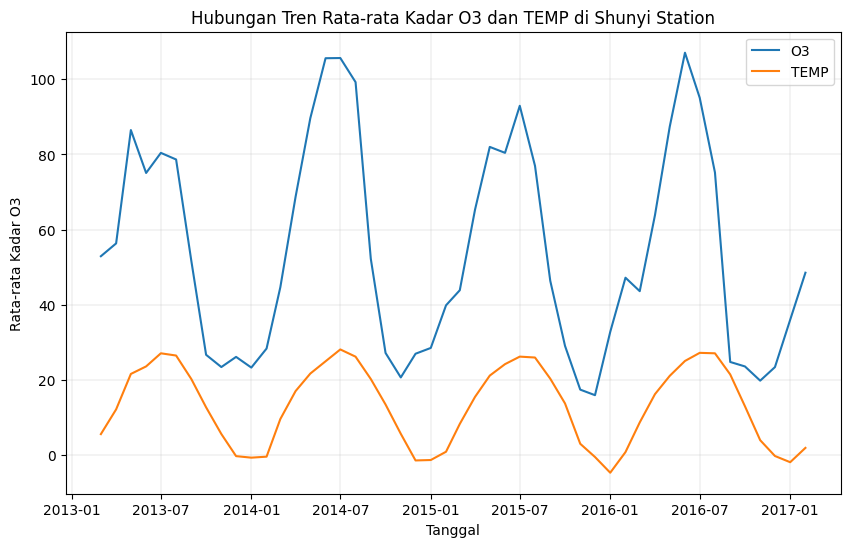

In [363]:
# Hubungan antara TEMP dengan O3
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_average_O3_TEMP,
             x="date",
             y="O3",
             label="O3")
sns.lineplot(data=monthly_average_O3_TEMP,
             x="date",
             y="TEMP",
             label="TEMP")
plt.title("Hubungan Tren Rata-rata Kadar O3 dan TEMP di Shunyi Station")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Kadar O3")
plt.legend()
plt.grid(linewidth = 0.2)
plt.show()

**Insight:**
- Terlihat pada line chart pada pertanyaan 1 bahwasannya tren dari O3 berupa musiman. Karena linenya berlika-liku atau naik dan turun.
- Terlihat pula pada bagian heatmap TEMP adalah atribut yang sangat memengaruhi O3 jika dilihat pada shunyi dataset. Bisa dilihat pula pada linechart antara tren rata-rata dari kadar O3 dan TEMP terbilang hampir sama. oleh karena itu, dapat dikatakan jika O3 nya tinggi maka TEMP nya pun juga tinggi demikian pula untuk sebaliknya

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren rata-rata bulanan untuk kadar O3 pada Shinyu Station berupa musiman dikarenakan ada waktunya O3 itu sangat tinggi hingga mencapai lebih dari 100 dan ada waktunya O3 kurang dari 20.
- Faktor yang paling mempengaruhi kadar O3 adalah faktor cuaca lebih tepatnya pada Temperatur udara yang menghasilkan nilai korelasi bernilai 0.57 yang dapat diartikan bahwasannya korelasi antara keduanya bernilai sedang atau masih ada hubungannya. Korelasi tersebut bisa dijabarkan seperti ini, Jika dan hanya jika Temperatur udara nya tinggi atau naik maka kadar O3 akan tinggi atau naik juga, Jika dan hanya jika Temperatur udaranya rendah atau turun maka kadar O3 akan sedikit atau turun juga.

In [364]:
# Downlaod file Shunyi Station yang sudah bersih
main_data.to_csv("main_data.csv")